In [5]:
from atomm.Indicators import MomentumIndicators
from atomm.DataManager.main import MSDataManager

# 

In [7]:
from src.data import make_dataset

In [8]:
import os
from dotenv import find_dotenv, load_dotenv

In [9]:
envs = find_dotenv()

In [12]:
load_dotenv(find_dotenv())

True

In [22]:
load_dotenv(find_dotenv())

True

In [13]:
iex_token = os.environ.get('APCA-API-SECRET-KEY')

In [15]:
iex_token

'0I7wO9I6dl7CSxULlnU0jo5PPxSBNUu8Wh1kRwbV'

In [103]:
import pandas as pd

In [105]:
symbols = pd.read_csv('../data/symbols.csv')

In [111]:
djia = symbols[symbols['index_name'] == 'DJIA']['trading_symbol'].to_list()

In [112]:
print(djia)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'WBA', 'DIS']


In [33]:
symbols_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']

In [155]:
import alpaca_trade_api as tradeapi

api = tradeapi.REST()

In [156]:
start0 = '2009-12-06'
end0 = '2010-12-06'

In [157]:
# Get daily price data for AAPL over the last 5 trading days.
djia0 = api.get_barset(symbols_list+['DJIA'], 'day', limit=1000).df

In [158]:
djia0.shape

(1002, 155)

In [106]:
list(set([x[0] for x in djia0.columns]))

['MCD',
 'DJIA',
 'CSCO',
 'TRV',
 'CAT',
 'WMT',
 'HD',
 'AXP',
 'INTC',
 'V',
 'DIS',
 'VZ',
 'WBA',
 'JNJ',
 'KO',
 'DOW',
 'MSFT',
 'MMM',
 'GS',
 'NKE',
 'AAPL',
 'UTX',
 'UNH',
 'CVX',
 'JPM',
 'BA',
 'PG',
 'IBM',
 'PFE',
 'XOM',
 'MRK']

In [111]:
djia0.tail()

Empty DataFrame
Columns: [(VOW3, open), (VOW3, high), (VOW3, low), (VOW3, close), (VOW3, volume)]
Index: []

In [118]:
djia0 = api.get_barset(['AAPL'], '15Min', limit=1000).df

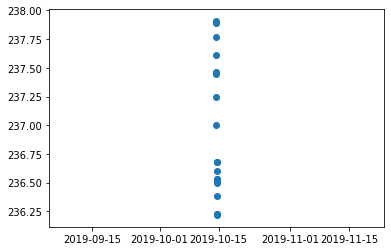

In [146]:
import matplotlib.pyplot as plt
import datetime as dt
fig = plt.figure()

plt.scatter(djia0['AAPL'].index[0:20], djia0['AAPL']['close'][:20])


In [145]:
djia0['AAPL'].index[0:20]

DatetimeIndex(['2019-10-14 10:00:00-04:00', '2019-10-14 10:15:00-04:00',
               '2019-10-14 10:30:00-04:00', '2019-10-14 10:45:00-04:00',
               '2019-10-14 11:00:00-04:00', '2019-10-14 11:15:00-04:00',
               '2019-10-14 11:30:00-04:00', '2019-10-14 11:45:00-04:00',
               '2019-10-14 12:00:00-04:00', '2019-10-14 12:15:00-04:00',
               '2019-10-14 12:30:00-04:00', '2019-10-14 12:45:00-04:00',
               '2019-10-14 13:00:00-04:00', '2019-10-14 13:15:00-04:00',
               '2019-10-14 13:30:00-04:00', '2019-10-14 13:45:00-04:00',
               '2019-10-14 14:00:00-04:00', '2019-10-14 14:15:00-04:00',
               '2019-10-14 14:30:00-04:00', '2019-10-14 14:45:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='time', freq=None)

In [51]:
fname = open(b'djia.pkl', 'wb')

In [53]:
pickle.dump(barset, fname)

In [55]:
df_loaded = pickle.load(open('djia.pkl', 'rb'))

In [73]:
df_loaded['AAPL']['open'][0]

AttributeError: 'numpy.float64' object has no attribute 'isnan'

In [32]:
aapl_bars = barset['AAPL']

# See how much AAPL moved in that timeframe.
week_open = aapl_bars[0].o
week_close = aapl_bars[-1].c
percent_change = (week_close - week_open) / week_open * 100
print('AAPL moved {}% over the last 5 days'.format(percent_change))

AAPL moved 1.2833464287050576% over the last 5 days


In [17]:
APCA_API_SECRET_KEY

NameError: name 'APCA_API_SECRET_KEY' is not defined

In [30]:
load_dotenv(find_dotenv())

True

In [31]:
os.environ.get('APCA-API-SECRET-KEY')

'0I7wO9I6dl7CSxULlnU0jo5PPxSBNUu8Wh1kRwbV'

In [29]:
os.environ.get('APCA-API-KEY-ID')

'PKLESJ8SNGS88UHWM1C4'

In [189]:
# Reads the S&P 500 companies from wikipedia

import wikitables
import json
import pandas as pd

tables = wikitables.import_tables(article='List of S&P 500 companies',) 
sp500_json = json.loads(tables[0].json())
pd.DataFrame(sp500_json)

List of S&P 500 companies[1][1]: dropping field from unknown column: Celgene
List of S&P 500 companies[1][1]: dropping field from unknown column: Bristol-Myers Squibb Co. (NYSE:BMY) acquired Celgene.
List of S&P 500 companies[1][2]: dropping field from unknown column: Nektar Therapeutics
List of S&P 500 companies[1][2]: dropping field from unknown column: Market Cap changes
List of S&P 500 companies[1][3]: dropping field from unknown column: Jefferies Financial Group Inc
List of S&P 500 companies[1][3]: dropping field from unknown column: JEF spinning off SPB
List of S&P 500 companies[1][4]: dropping field from unknown column: TSYS
List of S&P 500 companies[1][4]: dropping field from unknown column: S&P 500 constituent Global Payments Inc. (NYSE: GPN) acquired TSS.
List of S&P 500 companies[1][5]: dropping field from unknown column: Anadarko Petroleum
List of S&P 500 companies[1][5]: dropping field from unknown column: S&P 500 & 100 constituent Occidental Petroleum Corp. (NYSE:OXY) acq

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",,66740,1902
1,ABT,Abbott Laboratories,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Industrials,Industrial Machinery,"White Plains, New York",2011-11-01,1524472,
501,YUM,Yum! Brands Inc,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,
502,ZBH,Zimmer Biomet Holdings,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,
503,ZION,Zions Bancorp,[https://www.sec.gov/cgi-bin/browse-edgar?CIK=...,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,
